In [1]:
import fnmatch
import os
import pandas as pd
from os.path import isfile, join
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl

In [2]:
data_directory =  "/media/Carol/Magnetic/Experiments/Colloidal_Ice/Cairo_lattice/preAnalysis_17-05-2022/vertices"

In [3]:
Cairo = []
for file in os.listdir(data_directory):
    if fnmatch.fnmatch(file, "vertices_h=2_w=2_Exp*.dat"):
        print(file)
        Cairo.append(pd.read_csv(join(data_directory,file), sep = "\t", index_col = [0,1])) 
        
keys_Cairo = []
for i in range(len(Cairo)):
    keys_Cairo.append(i)

vertices_h=2_w=2_Exp21.dat
vertices_h=2_w=2_Exp2.dat
vertices_h=2_w=2_Exp8.dat
vertices_h=2_w=2_Exp5.dat
vertices_h=2_w=2_Exp4.dat
vertices_h=2_w=2_Exp23.dat
vertices_h=2_w=2_Exp24.dat
vertices_h=2_w=2_Exp31.dat
vertices_h=2_w=2_Exp10.dat
vertices_h=2_w=2_Exp7.dat
vertices_h=2_w=2_Exp14.dat
vertices_h=2_w=2_Exp26.dat
vertices_h=2_w=2_Exp28.dat
vertices_h=2_w=2_Exp20.dat
vertices_h=2_w=2_Exp29.dat
vertices_h=2_w=2_Exp30.dat
vertices_h=2_w=2_Exp11.dat
vertices_h=2_w=2_Exp25.dat
vertices_h=2_w=2_Exp6.dat
vertices_h=2_w=2_Exp19.dat
vertices_h=2_w=2_Exp17.dat
vertices_h=2_w=2_Exp9.dat
vertices_h=2_w=2_Exp22.dat
vertices_h=2_w=2_Exp16.dat
vertices_h=2_w=2_Exp18.dat
vertices_h=2_w=2_Exp27.dat
vertices_h=2_w=2_Exp1.dat
vertices_h=2_w=2_Exp0.dat
vertices_h=2_w=2_Exp3.dat
vertices_h=2_w=2_Exp12.dat
vertices_h=2_w=2_Exp15.dat


In [4]:
Cairo_exp = pd.concat(Cairo, keys = keys_Cairo)
Cairo_exp.index.names = ['Exp', 'frame', 'id']

In [5]:
Cairo_exp = Cairo_exp.query('coordination != 2')
# to reduce the N of vertices involved in the count.
#Cairo_exp = Cairo_exp.query('x > 300 & x < 680 & y < 650 & y > 300' )

In [6]:
frame0 = Cairo_exp.query('frame == 0')
frame0_f = frame0.query('x > 300 & x < 680 & y < 650 & y > 300' )

(177.66494975561886, 790.0711415555263, 180.10684358020103, 790.9721809687384)

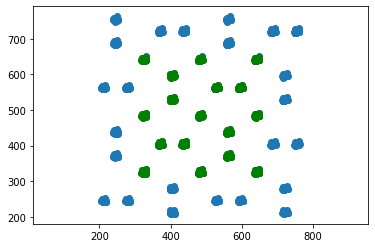

In [7]:
plt.plot(frame0.x,frame0.y,'o')
plt.plot(frame0_f.x,frame0_f.y,'o', c = 'green')
plt.axis('equal')

In [8]:
Cairo_exp["type"] = np.NaN

# 4-fold vertices classification

Cairo_exp.loc[Cairo_exp.charge==-4, "type"] = "Q = -4"
Cairo_exp.loc[Cairo_exp.charge==-2, "type"] = "Q = -2"
Cairo_exp.loc[Cairo_exp.charge==+2, "type"] = "Q = +2"
Cairo_exp.loc[Cairo_exp.charge==+4, "type"] = "Q = +4"

zeroq = Cairo_exp.charge==0

dipole_magnitude = np.sqrt(Cairo_exp[zeroq].dx**2+Cairo_exp[zeroq].dy**2)

Cairo_exp.loc[zeroq & (dipole_magnitude<1), "type"] = "Q = 0"
Cairo_exp.loc[zeroq & (dipole_magnitude>2) , "type"] = "Q = 0"

# 3-fold vertices classification

Cairo_exp.loc[Cairo_exp.charge==+1, "type"] = "Q = +1"
Cairo_exp.loc[Cairo_exp.charge==-1, "type"] = "Q = -1"
Cairo_exp.loc[Cairo_exp.charge==+3, "type"] = "Q = +3"
Cairo_exp.loc[Cairo_exp.charge==-3, "type"] = "Q = -3"

In [9]:
Cairo_exp

x           y  coordination  charge            dx  \
Exp frame id                                                               
0   0     0   251.266608  687.261210             3      -3  0.000000e+00   
          1   251.266608  754.205575             3       1 -1.732051e+00   
          2   410.022144  528.505674             3      -3  0.000000e+00   
          3   489.395042  482.618262             4       2 -1.000000e+00   
          4   761.005398  720.733392             3       3 -2.220446e-16   
...                  ...         ...           ...     ...           ...   
30  7600  43  536.301304  243.798525             3      -1 -1.999988e+00   
          44  329.553427  641.347536             4       2 -9.939479e-01   
          45  375.322209  721.174791             3      -1  1.006040e+00   
          47  409.584813  528.391998             3      -1  6.981303e-03   
          48  409.350315  595.570503             3      -1 -1.728550e+00   

                        dy    type  
Exp frame id                        
0   0     0   2.220446e-16  Q = -3  
          1   1.000000e+00  Q = +1  
          2   2.220446e-16  Q = -3  
          3  -1.732051e+00  Q = +2  
          4   0.000000e+00  Q = +3  
...                    ...     ...  
30  7600  43 -6.981303e-03  Q = -1  
          44 -1.735531e+00  Q = +2  
          45 -1.728550e+00  Q = -1  
          47 -1.999988e+00  Q = -1  
          48 -1.006040e+00  Q = -1  

[96596 rows x 7 columns]

## Is count_vertices working properly?

In [10]:
exp = 'Exp'
time = 'frame'
column = 'type'
column1 = 'coordination'
vrt_count = Cairo_exp.groupby([exp,time,column,column1]).count().iloc[:,0].to_frame("number")

vrt_count = vrt_count.reindex(pd.MultiIndex.from_product(
    [vrt_count.index.get_level_values(exp).unique(),
    vrt_count.index.get_level_values(time).unique(),
    vrt_count.index.get_level_values(column).unique(),
    vrt_count.index.get_level_values(column1).unique()]), fill_value = 0)

total_vrt = vrt_count.groupby([exp,time,column1]).sum()
array_coord = total_vrt.loc[vrt_count.index.get_level_values('frame')].number.values
array_coordT = np.tile(array_coord[:2],int(len(vrt_count)/len(array_coord[:2])))# 2-coordination lattices 
vrt_count["fraction"] = vrt_count.number / array_coordT

In [11]:
vrt_count.query('frame == 4400')

number  fraction
Exp frame type   coordination                  
0   4400  Q = +1 3                  7  0.218750
                 4                  0  0.000000
          Q = +2 3                  0  0.000000
                 4                  3  0.333333
          Q = +3 3                  3  0.093750
...                               ...       ...
30  4400  Q = -3 4                  0  0.000000
          Q = -4 3                  0  0.000000
                 4                  0  0.000000
          Q = 0  3                  0  0.000000
                 4                  3  0.333333

[558 rows x 2 columns]

## End

In [12]:
def count_vertices(vrt, exp = 'Exp', column = "type", column1 = "coordination", time = "frame"):
    vrt_count = vrt.groupby([exp,time,column,column1]).count().iloc[:,0].to_frame("number")

    vrt_count = vrt_count.reindex(pd.MultiIndex.from_product(
        [vrt_count.index.get_level_values(exp).unique(),
        vrt_count.index.get_level_values(time).unique(),
        vrt_count.index.get_level_values(column).unique(),
        vrt_count.index.get_level_values(column1).unique()]), fill_value = 0)

    total_vrt = vrt_count.groupby([exp,time,column1]).sum()
    array_coord = total_vrt.loc[vrt_count.index.get_level_values('frame')].number.values
    array_coordT = np.tile(array_coord[:2],int(len(vrt_count)/len(array_coord[:2])))# 2-coordination lattices 
    vrt_count["fraction"] = vrt_count.number / array_coordT
        
    return vrt_count

In [13]:
count_m = count_vertices(Cairo_exp)

In [14]:
count_m

number  fraction
Exp frame type   coordination                  
0   0     Q = +1 3                 13  0.406250
                 4                  0  0.000000
          Q = +2 3                  0  0.000000
                 4                  5  0.555556
          Q = +3 3                  4  0.125000
...                               ...       ...
30  8900  Q = -3 4                  0  0.000000
          Q = -4 3                  0  0.000000
                 4                  0  0.000000
          Q = 0  3                  0  0.000000
                 4                  0  0.000000

[50220 rows x 2 columns]

In [15]:
count_m = count_m.query('fraction != 0')

In [16]:
v_counts_m = count_m.groupby(["frame","type","coordination"]).mean()
v_counts_m["err"] = count_m['fraction'].groupby(["frame","type","coordination"]).std()/np.sqrt(count_m['fraction'].groupby(["frame","type","coordination"]).count().values)

In [17]:
v_counts_m.tail(20)

number  fraction  err
frame type   coordination                       
8700  Q = +1 3               11.0  0.343750  NaN
      Q = +2 4                2.0  0.222222  NaN
      Q = +3 3                1.0  0.031250  NaN
      Q = -1 3               20.0  0.625000  NaN
      Q = -2 4                1.0  0.111111  NaN
      Q = 0  4                6.0  0.666667  NaN
8800  Q = +1 3               12.0  0.375000  NaN
      Q = +2 4                1.0  0.111111  NaN
      Q = +3 3                2.0  0.062500  NaN
      Q = -1 3               17.0  0.531250  NaN
      Q = -2 4                2.0  0.222222  NaN
      Q = -3 3                1.0  0.031250  NaN
      Q = 0  4                6.0  0.666667  NaN
8900  Q = +1 3               13.0  0.406250  NaN
      Q = +2 4                1.0  0.111111  NaN
      Q = +3 3                2.0  0.062500  NaN
      Q = -1 3               16.0  0.500000  NaN
      Q = -2 4                2.0  0.222222  NaN
      Q = -3 3                1.0  0.031250  NaN
      Q = 0  4                6.0  0.666667  NaN

In [18]:
v_counts_m = v_counts_m.query('number != 0')

v_counts_m.head(10)

number  fraction       err
frame type   coordination                               
0     Q = +1 3             12.451613  0.389113  0.017137
      Q = +2 4              2.551724  0.283525  0.034254
      Q = +3 3              4.096774  0.128024  0.009091
      Q = +4 4              1.416667  0.157407  0.028878
      Q = -1 3             11.483871  0.358871  0.018495
      Q = -2 4              2.392857  0.265873  0.028195
      Q = -3 3              3.967742  0.123992  0.011271
      Q = -4 4              1.187500  0.131944  0.011198
      Q = 0  4              3.400000  0.377778  0.025880
100   Q = +1 3             12.290323  0.384073  0.015755

In [19]:
def magnetic_field_value(time):
    
    m = 6.82628571 
    b = 0.55685714
    slope = 4/600 # 4V in 600s
    
    magnetic_field_value = (m*(time*slope)+b)
    
    return magnetic_field_value # in mT

v_counts_m['mT'] = magnetic_field_value(v_counts_m.index.get_level_values('frame')/30)

In [20]:
mpl.rc('text', usetex=False)
mpl.rcParams['figure.dpi'] = 75

mpl.rcParams['font.family'] = 'Arial'

mpl.rcParams['axes.prop_cycle'] = mpl.cycler(color=["blue", "green", "purple", 
                                                    "orange", "royalblue", "limegreen", 
                                                    "blueviolet","darkorange", "tomato",
                                                    "red","black"])

In [32]:
v_counts_m = v_counts_m.query('mT < 10')


In [33]:
v_counts_m.to_csv('Cairo_experimental_data-N=30.dat', sep = '\t')

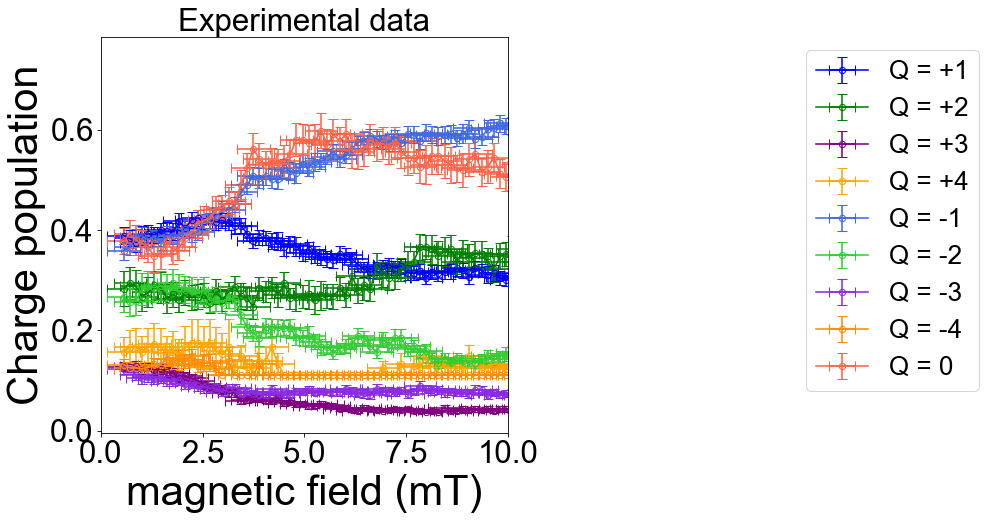

In [22]:
fig, ax1 = plt.subplots(figsize=(7,7))

#ax2 = ax1.twinx()



for typ_m, mtype in v_counts_m.groupby('type'):
    
    ax1.errorbar(mtype['mT'], mtype["fraction"],yerr = mtype["err"],xerr = 0.4 , dash_capstyle= 'butt',capsize=5, capthick=1, ls = '-',fmt ='-o', fillstyle = 'none',label = typ_m)
    #ax1.errorbar(mtype.index.get_level_values('frame'), mtype["fraction"],yerr = mtype["err"], ls='--', marker='o', capsize=5, capthick=1, ecolor='black',label = typ_m)

    #ax1.plot(mtype['mT'], mtype["fraction"],'-.', label = typ_m)

ax1.tick_params(axis='y', labelsize=30)
ax1.tick_params(axis='x', labelsize=30)  

ax1.legend(fontsize = 25, bbox_to_anchor=(1.7, 1))
ax1.set_xlabel('magnetic field (mT)', size = 40)
ax1.set_ylabel('Charge population', size = 40)
ax1.set_title(f"Experimental data", size = 30)
ax1.set_xlim(0,10)

#ax2.plot([0,2000,2500],[0,25,25],':', color = 'black', alpha = 0.5, lw = 5)


#ax2.set_ylabel('B (mT)', size = 40)
#ax2.tick_params(axis='y', labelsize=30)

#v_counts_m.to_csv('FreeBound.dat', sep = "\t")

plt.show()

In [23]:
coord4 = v_counts_m.query('coordination == 4')
coord3 = v_counts_m.query('coordination == 3')


Q = +2
Q = +4
Q = -2
Q = -4
Q = 0
Q = +1
Q = +3
Q = -1
Q = -3


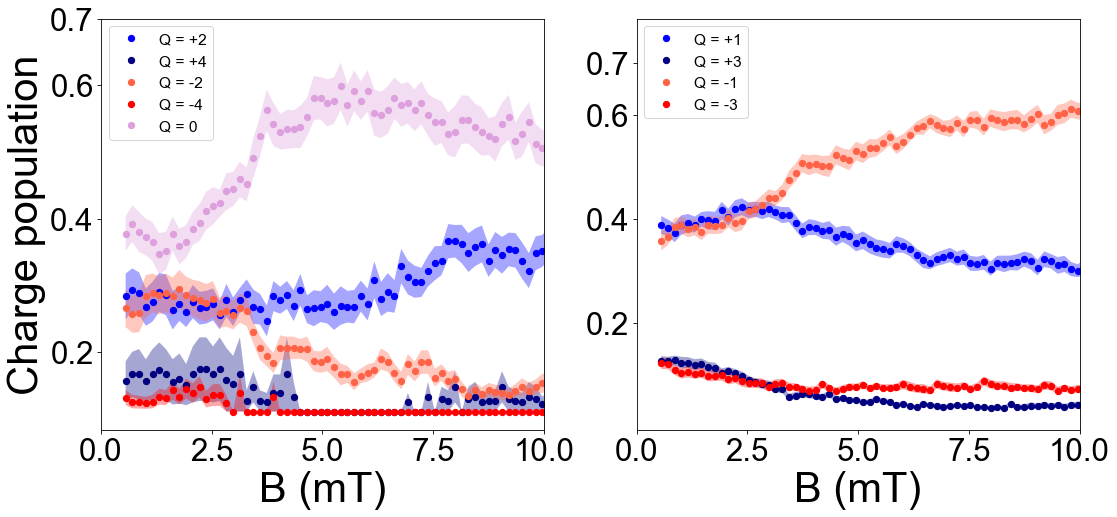

In [24]:
mpl.rc('text', usetex=False)
mpl.rcParams['figure.dpi'] = 75

mpl.rcParams['font.family'] = 'Arial'

mpl.rcParams['axes.prop_cycle'] = mpl.cycler(color=["blue", "navy", "tomato", 
                                                    "red", "plum", "blue", 
                                                    "navy", "tomato",
                                                    "red"]) 

fig, ax = plt.subplots(1, 2,figsize=(15,7))

for typ_m, mtype in coord4.groupby('type'):
    print(typ_m)
    ax[0].errorbar(mtype['mT'], mtype["fraction"], dash_capstyle= 'butt',capsize=5, capthick=1, ls = '',fmt ='o',label = typ_m)
    #ax[0].errorbar(mtype['mT'], mtype["fraction"],yerr = mtype["err"],xerr = 0.4, fmt = '-o', fillstyle = 'none',label = typ_m)
    ax[0].fill_between(mtype['mT'], mtype["fraction"]- mtype["err"], mtype["fraction"] + mtype["err"], alpha=0.35)

    
for typ_m, mtype in coord3.groupby('type'):
    print(typ_m)
    ax[1].errorbar(mtype['mT'], mtype["fraction"],fmt = 'o',label = typ_m)
    ax[1].fill_between(mtype['mT'], mtype["fraction"]- mtype["err"], mtype["fraction"] + mtype["err"], alpha=0.35)


ax[0].tick_params(axis='y', labelsize=30)
ax[0].set_yticks([0.2,0.4,0.6,0.7])
ax[0].tick_params(axis='x', labelsize=30)  
ax[0].set_xlim(0,10)

ax[0].legend(fontsize = 15)
ax[0].set_xlabel('B (mT)', size = 40)
ax[0].set_ylabel('Charge population', size = 40)

ax[1].tick_params(axis='y', labelsize=30)
ax[1].tick_params(axis='x', labelsize=30)  
ax[1].set_yticks([0.2,0.4,0.6,0.7])


ax[1].legend(fontsize = 15, loc = 'upper left')
ax[1].set_xlabel('B (mT)', size = 40)
ax[1].set_xlim(0,10)



plt.tight_layout()

In [25]:
coord4 = coord4.query('mT < 10')
coord3 = coord3.query('mT < 10')

In [26]:
coord4.to_csv("Vertex_count_coordination4.dat", sep='\t')
coord3.to_csv("Vertex_count_coordination3.dat", sep='\t')

In [27]:
coord4

number  fraction       err        mT
frame type   coordination                                        
0     Q = +2 4             2.551724  0.283525  0.034254  0.556857
      Q = +4 4             1.416667  0.157407  0.028878  0.556857
      Q = -2 4             2.392857  0.265873  0.028195  0.556857
      Q = -4 4             1.187500  0.131944  0.011198  0.556857
      Q = 0  4             3.400000  0.377778  0.025880  0.556857
...                             ...       ...       ...       ...
6200  Q = +2 4             3.166667  0.351852  0.023874  9.961962
      Q = +4 4             1.100000  0.122222  0.011111  9.961962
      Q = -2 4             1.380952  0.153439  0.014296  9.961962
      Q = -4 4             1.000000  0.111111  0.000000  9.961962
      Q = 0  4             4.548387  0.505376  0.027187  9.961962

[315 rows x 4 columns]

Q = +2
Q = +4
Q = -2
Q = -4
Q = 0
Q = +1
Q = +3
Q = -1
Q = -3


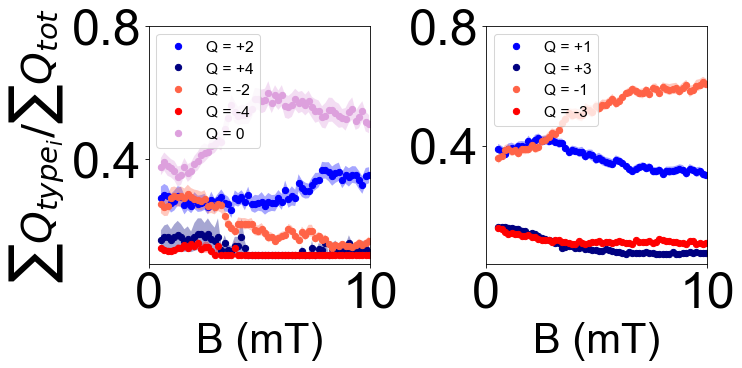

In [28]:
fig, ax = plt.subplots(1, 2,figsize=(10,5))

for typ_m, mtype in coord4.groupby('type'):
    print(typ_m)
    ax[0].errorbar(mtype['mT'], mtype["fraction"], dash_capstyle= 'butt',capsize=5, capthick=1, ls = '',fmt ='o',label = typ_m)
    #ax[0].errorbar(mtype['mT'], mtype["fraction"],yerr = mtype["err"],xerr = 0.4, fmt = '-o', fillstyle = 'none',label = typ_m)
    ax[0].fill_between(mtype['mT'], mtype["fraction"]- mtype["err"], mtype["fraction"] + mtype["err"], alpha=0.35)

    
for typ_m, mtype in coord3.groupby('type'):
    print(typ_m)
    ax[1].errorbar(mtype['mT'], mtype["fraction"],fmt = 'o',label = typ_m)
    ax[1].fill_between(mtype['mT'], mtype["fraction"]- mtype["err"], mtype["fraction"] + mtype["err"], alpha=0.35)


ax[0].tick_params(axis='y', labelsize=48)
ax[0].set_yticks([0.4,0.8])
ax[0].tick_params(axis='x', labelsize=48)  
ax[0].set_xlim(0,10)

ax[0].legend(fontsize = 15)
ax[0].set_xlabel('B (mT)', size = 40)
ax[0].set_ylabel('$\sum Q_{type_{i}}/ \sum Q_{tot}$', size = 40)

ax[1].tick_params(axis='y', labelsize=48)
ax[1].tick_params(axis='x', labelsize=48)  
ax[1].set_yticks([0.4,0.8])


ax[1].legend(fontsize = 15, loc = 'upper left')
ax[1].set_xlabel('B (mT)', size = 40)
ax[1].set_xlim(0,10)



plt.tight_layout()

In [29]:
coord4['type_charge'] = coord4.index.get_level_values('type')

In [30]:
def numerical_charge_value(row):
    
    value = row['type_charge'][3:]

    return value

coord4['charge'] = coord4.apply (lambda row: numerical_charge_value(row) , axis=1)

In [31]:
coord4

number  fraction       err        mT type_charge  \
frame type   coordination                                                       
0     Q = +2 4             2.551724  0.283525  0.034254  0.556857      Q = +2   
      Q = +4 4             1.416667  0.157407  0.028878  0.556857      Q = +4   
      Q = -2 4             2.392857  0.265873  0.028195  0.556857      Q = -2   
      Q = -4 4             1.187500  0.131944  0.011198  0.556857      Q = -4   
      Q = 0  4             3.400000  0.377778  0.025880  0.556857       Q = 0   
...                             ...       ...       ...       ...         ...   
6200  Q = +2 4             3.166667  0.351852  0.023874  9.961962      Q = +2   
      Q = +4 4             1.100000  0.122222  0.011111  9.961962      Q = +4   
      Q = -2 4             1.380952  0.153439  0.014296  9.961962      Q = -2   
      Q = -4 4             1.000000  0.111111  0.000000  9.961962      Q = -4   
      Q = 0  4             4.548387  0.505376  0.027187  9.961962       Q = 0   

                          charge  
frame type   coordination         
0     Q = +2 4                +2  
      Q = +4 4                +4  
      Q = -2 4                -2  
      Q = -4 4                -4  
      Q = 0  4                 0  
...                          ...  
6200  Q = +2 4                +2  
      Q = +4 4                +4  
      Q = -2 4                -2  
      Q = -4 4                -4  
      Q = 0  4                 0  

[315 rows x 6 columns]